<a href="https://colab.research.google.com/github/ChiHsiang-67/3D-LAKES/blob/main/Generation%20of%20Quality%20Controlled%20A-E%20Relationships.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

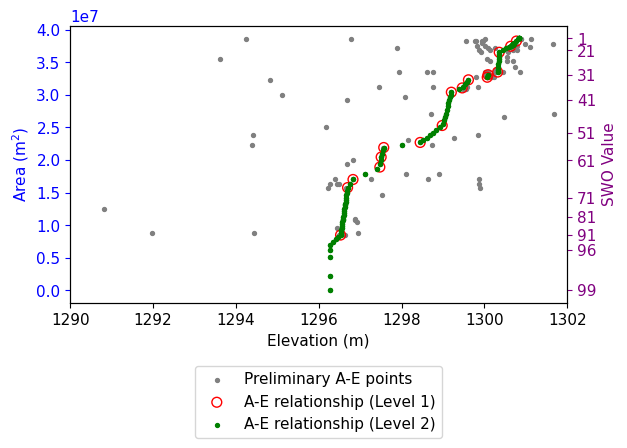

In [2]:
import geopandas as gdp
import numpy as np
import pandas as pd
import numpy as np
import glob
import json
from scipy.interpolate import interp1d
from sklearn.linear_model import RANSACRegressor
from sklearn.datasets import make_regression
from sklearn.linear_model import HuberRegressor, LinearRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.isotonic import IsotonicRegression
import time
import math
import multiprocessing
from multiprocessing import Pool
import matplotlib.pyplot as plt
import glob
import os
import matplotlib.pyplot as plt
from scipy.stats import linregress
## Tranining data ()
Test = {
    "area_ice": {"0": [38263492.89220666, 38263492.89220666, 38263492.89220666, 38263492.89220666, 38263492.89220666, 33503712.469223555, 33503712.469223555, 33503712.469223555, 33503712.469223555, 33503712.469223555, 33503712.469223555, 33503712.469223555, 33503712.469223555, 33503712.469223555, 32710524.18000737, 32710524.18000737, 32710524.18000737, 32710524.18000737, 36845644.424444504, 36845644.424444504, 36845644.424444504, 36845644.424444504, 38538733.783378474, 38538733.783378474, 38538733.783378474, 38538733.783378474, 38538733.783378474, 38538733.783378474, 35885229.39993007, 36544376.025833264, 36544376.025833264, 8781293.149163604, 8781293.149163604, 8781293.149163604, 19419577.50606986, 17015286.50635386, 17015286.50635386, 17015286.50635386, 17015286.50635386, 17015286.50635386, 15772473.026121771, 15772473.026121771, 15772473.026121771, 26625943.628358018, 35183137.38675184, 35183137.38675184, 35183137.38675184, 16372407.072600298, 16372407.072600298, 16372407.072600298, 16372407.072600298, 31272504.393979665, 31272504.393979665, 31272504.393979665, 31272504.393979665, 23822781.077132974, 23822781.077132974, 37122837.378674276, 37122837.378674276, 37122837.378674276, 32316207.442300223, 32316207.442300223, 29231947.810729492, 21923423.721741628, 21923423.721741628, 8487833.002784194, 8487833.002784194, 9562769.060032053, 37787189.506065354, 37333660.188933544, 37815819.764248714, 37815819.764248714, 34316421.3890193, 30865173.902552813, 30865173.902552813, 30865173.902552813, 37462496.35075865, 37462496.35075865, 37462496.35075865, 33098334.04085466, 33098334.04085466, 33865494.82263143, 33865494.82263143, 22322945.960936654, 22322945.960936654, 20458075.05290254, 14590173.500686323, 30047259.48126918, 11017056.038209392, 19953792.096263867, 10443149.499170281, 29696538.818523057, 10722294.516458012, 17886557.317888293, 17886557.317888293, 12440760.695145419, 27144541.714088373, 27144541.714088373, 23076442.301307734, 25016142.293230172, 38673426.13437745, 30412945.96079297, 35552077.30470555, 35552077.30470555, 37997361.62863863, 23457094.597609185] },
    "elevation_ice": {"0": [1299.9345703125, 1299.7955322266, 1299.5440673828, 1299.7807617188, 1299.9611816406, 1300.2869873047, 1300.0042724609, 1298.6059570312, 1300.8638916016, 1300.4533691406, 1297.9400634766, 1300.2591552734, 1300.0972900391, 1298.7551269531, 1300.0733642578, 1300.1851806641, 1300.2238769531, 1299.7934570312, 1300.6912841797, 1300.7833251953, 1299.8807373047, 1300.1352539062, 1300.8723144531, 1300.8920898438, 1294.2468261719, 1296.7779541016, 1301.1173095703, 1300.0231933594, 1300.5426025391, 1300.5756835938, 1299.9130859375, 1291.9831542969, 1294.4318847656, 1296.9547119141, 1296.6739501953, 1296.8342285156, 1296.3929443359, 1299.8656005859, 1298.6401367188, 1297.2554931641, 1296.6467285156, 1299.8992919922, 1296.2213134766, 1300.4813232422, 1300.5339355469, 1300.6888427734, 1300.1337890625, 1296.2738037109, 1296.4516601562, 1299.8739013672, 1296.4790039062, 1297.4603271484, 1299.8572998047, 1299.5919189453, 1298.7641601562, 1294.4078369141, 1299.8350830078, 1300.0948486328, 1300.2521972656, 1297.8809814453, 1294.8198242188, 1299.6146240234, 1296.6934814453, 1297.5841064453, 1297.5545654297, 1296.4943847656, 1296.6463623047, 1296.4404296875, 1301.6678466797, 1301.08984375, 1300.6903076172, 1300.9793701172, 1300.7275390625, 1299.4871826172, 1299.5633544922, 1299.5274658203, 1300.0245361328, 1300.7880859375, 1299.8099365234, 1300.1257324219, 1300.0495605469, 1300.2545166016, 1300.3371582031, 1294.3858642578, 1298.7447509766, 1297.5073242188, 1297.5203857422, 1295.1019287109, 1296.8714599609, 1296.8336181641, 1296.9332275391, 1298.0822753906, 1296.8740234375, 1298.9069824219, 1298.1175537109, 1290.8067626953, 1298.7061767578, 1301.6723632812, 1298.1536865234, 1296.1770019531, 1279.0172119141, 1299.2021484375, 1300.0590820312, 1293.6163330078, 1299.9443359375, 1299.2568359375] },
    "swo_ice": {"0": [7.0, 7.0, 7.0, 7.0, 7.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 32.0, 32.0, 32.0, 32.0, 21.0, 21.0, 21.0, 21.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 24.0, 22.0, 22.0, 90.0, 90.0, 90.0, 62.0, 65.0, 65.0, 65.0, 65.0, 65.0, 67.0, 67.0, 67.0, 46.0, 26.0, 26.0, 26.0, 66.0, 66.0, 66.0, 66.0, 36.0, 36.0, 36.0, 36.0, 52.0, 52.0, 20.0, 20.0, 20.0, 33.0, 33.0, 41.0, 57.0, 57.0, 91.0, 91.0, 87.0, 13.0, 19.0, 12.0, 12.0, 28.0, 37.0, 37.0, 37.0, 18.0, 18.0, 18.0, 31.0, 31.0, 29.0, 29.0, 56.0, 56.0, 60.0, 70.0, 39.0, 82.0, 61.0, 84.0, 40.0, 83.0, 64.0, 64.0, 77.0, 45.0, 45.0, 54.0, 49.0, 3.0, 38.0, 25.0, 25.0, 8.0, 53.0] },
    "swo_area": {"0": [38685789.20041197, 38677330.26049416, 38673426.13437824, 38672124.75900627, 38671474.07132029, 38538733.783379264, 38263492.89220744, 37997361.628639415, 37880237.84516204, 37838593.83325897, 37826881.45491124, 37815819.76424949, 37787189.50606613, 37725374.17589752, 37668764.347216785, 37610202.4554781, 37534071.99621781, 37462496.35075942, 37333660.188934304, 37122837.378675036, 36845644.42444526, 36544376.02583402, 36237902.12573489, 35885229.399930805, 35552077.304706275, 35183137.38675256, 34768649.33077986, 34316421.38902, 33865494.82263212, 33503712.46922424, 33098334.040855337, 32710524.18000804, 32316207.442300886, 31940760.64748731, 31622574.36904045, 31272504.393980302, 30865173.902553443, 30412945.96079359, 30047259.481269795, 29696538.818523664, 29231947.81073009, 28813555.62864148, 28324889.176466443, 27745126.44825345, 27144541.714088924, 26625943.62835856, 26071557.719899002, 25536041.754333016, 25016142.293230683, 24563263.663784843, 24162440.04921784, 23822781.077133458, 23457094.597609665, 23076442.301308203, 22697091.380378716, 22322945.960937113, 21923423.721742075, 21479004.03221405, 20963659.384913612, 20458075.05290296, 19953792.096264273, 19419577.50607026, 18687553.859336685, 17886557.31788866, 17015286.506354205, 16372407.072600631, 15772473.026122093, 15313738.207502386, 14922024.220539175, 14590173.500686621, 14250514.528602242, 13934280.313213337, 13613491.284022536, 13320681.825329106, 13041996.116996182, 12735522.21689706, 12440760.695145672, 12168122.55471779, 11894833.726603922, 11613085.958572244, 11309865.496903047, 11017056.038209617, 10722294.51645823, 10443149.499170495, 10154894.854278963, 9853626.455667723, 9562769.060032248, 9305747.424068015, 9036362.722070059, 8781293.149163783, 8487833.002784368, 8137763.027724222, 7804610.932499697, 7401434.635397481, 6919925.747768285, 6233450.239053688, 5058910.483238144, 2240307.4959820695, 63767.3932265692] },
    "swo": {"0": [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0] }
}


def iso_search_record_improve():
  r2_t=[]
  rmse2_t=[]
  index=[]
  list_t=[]
  iteration_time=2000
  for i in range(iteration_time):
    try:
      x_iso,y_iso,r,NRMSE=ISO2_2(SWO_final3['area'],SWO_final3['elevation'])
      swo_pre=interp1d(SWO_final2['area'],SWO_final2['swo'])
      list_t.append([x_iso,y_iso,r,NRMSE,swo_pre(np.min(y_iso))-swo_pre(np.max(y_iso))])
    except:
      []
  df = pd.DataFrame(list_t, columns=['E','A','R','NRMSE','RANGE'])
  if len(df)!=0:
    non_zero_range_df =df.nsmallest(n=int(iteration_time/10), columns=['NRMSE']).nlargest(n=1, columns=['RANGE'])
    if len(non_zero_range_df)>0:
      x_iso,y_iso,NRMSE,Ragne=non_zero_range_df['E'].tolist()[0],non_zero_range_df['A'].tolist()[0],non_zero_range_df['NRMSE'].tolist()[0],non_zero_range_df['RANGE'].tolist()[0]
    else:
      df2 = df[df['RANGE'] != 0]
      non_zero_range_df =df2.nsmallest(n=10, columns=['NRMSE']).head(1)
      x_iso,y_iso,NRMSE,Ragne=non_zero_range_df['E'].tolist()[0],non_zero_range_df['A'].tolist()[0],non_zero_range_df['NRMSE'].tolist()[0],non_zero_range_df['RANGE'].tolist()[0]
    return x_iso,y_iso,NRMSE,Ragne
  else:
    return [],[],[],[]

def ISO2_2(Area,E_AVA):
  #Area,E_AVA=SWO_final['area']*A['index'],SWO_final['elevation']
  X=np.array(E_AVA).reshape(-1, 1)
  Y=np.array(Area).reshape(-1, 1)
  reg = RANSACRegressor().fit(X, Y)
  X_inliers=X[reg.inlier_mask_]
  y_inliers=Y[reg.inlier_mask_]

  ir = IsotonicRegression()
  y_ = ir.fit_transform(y_inliers.flatten(),X_inliers.flatten())

  df_iso=pd.DataFrame({'x':y_.flatten(),'y':y_inliers.flatten()})
  medians = df_iso.groupby('x')['y'].median().reset_index()
  ##check the linearity using the RANSACRegressor()
  try:
    X=np.array(medians.x).reshape(-1, 1)
    Y=np.array(medians.y).reshape(-1, 1)
    reg = RANSACRegressor().fit(X, Y)
    X_inliers=X[reg.inlier_mask_]
    y_inliers=Y[reg.inlier_mask_]
  except:
    X_inliers=np.array(medians.x)
    y_inliers=np.array(medians.y)
  #r22(medians.x,medians.y)
  #print(r2_score(Y,ir.predict([y_inliers.flatten()])))
  r2_score(X_inliers.flatten(),ir.predict(y_inliers.flatten()))
  #return [medians.x,medians.y,r2_score(X_inliers.flatten(),ir.predict(y_inliers.flatten()))]
  x_interp = interp1d(y_inliers.flatten(),X_inliers.flatten(),bounds_error=False,fill_value=np.nan)
  x_pre=x_interp(Area)
  index=~np.isnan(x_pre)
  MSE = mean_squared_error(E_AVA[index], x_pre[index])
  RMSE = math.sqrt(MSE)
  NRMSE=MSE/np.std(E_AVA[index])
  return [medians.x,medians.y,r2_score(X_inliers.flatten(),ir.predict(y_inliers.flatten())),NRMSE]

def interpolation_elevation(x1,y1,z1,swo):
    x1,y1,z1,swo=np.array(x1),np.array(y1),np.array(z1),np.array(swo)
    y_pred = []
    # Perform linear regression on x1 and y1 to obtain slope and intercept
    slope, intercept, _, _, _ = linregress(x1, y1)

    # Function to predict a single value, using linear regression for extrapolation
    def predict_single_value(z):
        if np.min(x1) <= z <= np.max(x1):
            # Interpolation
            f = interp1d(x1, y1)
            return f(z)
        else:
            # Extrapolation based on linear regression
            if z < np.min(x1):
                  return y1[0] + (z - x1[0]) * slope
            else:
                  return y1[-1] + (z - x1[-1]) * slope


    # Predict all values
    y_pred = np.array([predict_single_value(z) for z in z1])

    # Apply capping rules
    y_pred[swo >= 95] = y_pred[swo == 95][0]
    y_pred[swo <= 5] = y_pred[swo == 5][0]
    return y_pred, z1

SWO_final2=pd.DataFrame({})
SWO_final2['elevation'],SWO_final2['area'],SWO_final2['swo']=Test['elevation_ice']['0'],Test['area_ice']['0'],Test['swo_ice']['0']
SWO_final3=SWO_final2[(SWO_final2['swo'] >= 5) & (SWO_final2['swo'] <= 95)]
x_iso,y_iso,NRMSE,Ragne=iso_search_record_improve()
y_pred,x_pred=interpolation_elevation(np.array(y_iso),np.array(x_iso),np.array(Test['swo_area']['0']),np.array(Test['swo']['0']))
fig, ax1 = plt.subplots()
ax1.scatter(SWO_final2['elevation'],SWO_final2['area'],s=8,color='grey')
ax1.scatter(x_iso,y_iso,s=50,color='red',marker='o', facecolors='none')
ax1.scatter(y_pred,np.array(Test['swo_area']['0']),s=8,color='green')
# ax1.scatter(x_iso,y_iso,s=12,color='red')
ax1.set_xlabel('Elevation (m)')
ax1.set_ylabel('Area (m$^2$)', color='b')

# ax1.set_xlim([1290,1301])
ax2 = ax1.twinx()
ax2.scatter(y_pred,np.array(Test['swo_area']['0']),s=8,color='green')

c=np.array(Test['swo_area']['0'])
custom_ticks = c[[0,20,30,40,50,60,70,80,90,95,98]]
ax2.set_yticks(custom_ticks)
numbers_str = ",".join(str(i) for i in range(101))
ax2.set_ylabel('SWO Value', color='purple')
ax2.set_yticklabels(['1','21','31','41','51','61','71','81','91','96','99'])
# ax2.set_yticklabels(np.array(Test['swo']['0'])[[0,20,30,40,50,60,70,80,90,95,98]])
plt.rcParams.update({'font.size': 11})
ax1.tick_params(axis='y', colors='blue')
ax2.tick_params(axis='y', colors='purple')
ax1.set_xlim([1290,1302])
# ax1.legend(['Preliminary A-E curve','A-E-SWO (post-extrapolation)','A-E-SWO'],loc='upper left')
ax1.legend(['Preliminary A-E points','A-E relationship (Level 1)','A-E relationship (Level 2)'],loc='upper center', bbox_to_anchor=(0.5, -0.2))
# ax1.legend(['Preliminary A-E curve', 'A-E-SWO (Extrapolation)', 'A-E-SWO'], loc='upper center', bbox_to_anchor=(0.5, -0.15))
plt.tight_layout()